## Random sampling과  Sample bias
모집단(population)의 특성을 분석(모수 추정)하는 것이 목표이나 전체 대상을 조사하는 것은 불가능함   
모집단의 일부인 표본집단(sample)을 분석하여 모집단의 특성 예측   

모집단의 특성을 잘 반영하는 표본집단을 구성하기 위해서,   
데이터의 양도 중요하나 데이터 질을 고려해야 함
* completeness: 공백이나 누락 제거
* consistency of format: 데이터 양식을 일관성있게 지킴
* cleanliness: 불완전, 부정확, 관련 없는 데이터 제거
* accuracy: 오류, 훼손 없이 정확한 값
* representativeness: 모집단의 특성을 가지고 있어, 모집단을 대표할 수 있음

### 편향(Bias)
Statistical bias: 표본집단 선정 및 데이터 측정 과정의 문제로 일어난 error   
무작위적이지 않고 어떤 편향성을 가지고 있어 모집단의 특성을 반영하지 못함   
측정 장비의 문제 또는 주요 변수 누락 등이 원인
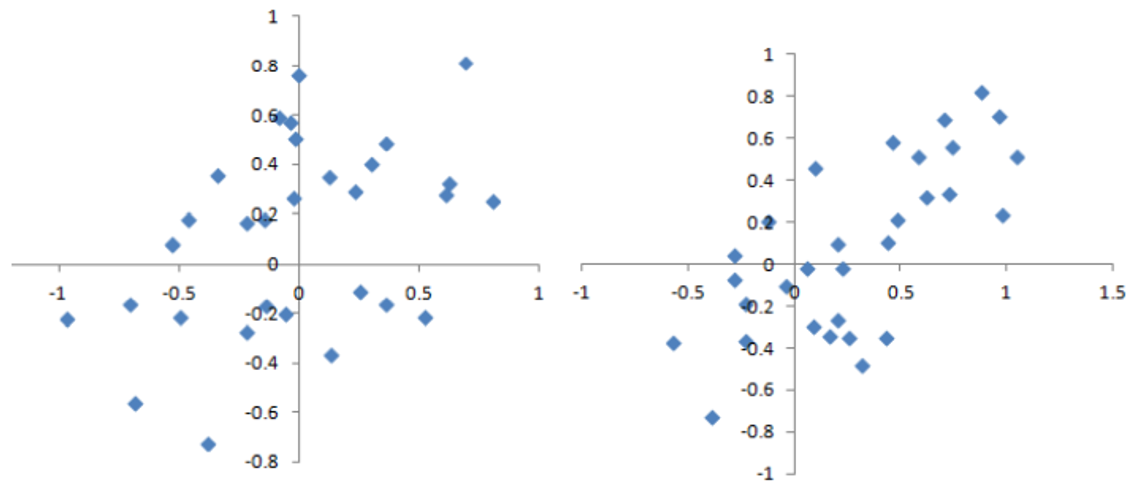

### Simple Random Sampling
bias를 줄이기 위해 모집단의 각 요소(element)를 랜덤으로 골라 표본집단을 구성하는 것

### Stratified Sampling
몇가지 하위 그룹으로 구성된 모집단에 대해,   
각 하위 그룹에 맞추어 random sampling을 진행하는 것
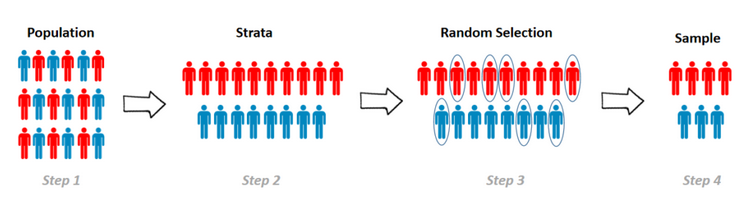

## Sampling distribution of Statistic
통계량(statistic): 주어진 표본으로부터 계산하여 얻은, 분포 특징을 수치화한 값(평균, 분산 등)   
sampling distribution of statistic: 동일한 모집단으로부터 여러 표본집단들을 추출했을 때 각 표본집단에 대한 통계량들이 이루는 분포

### 중심 극한 정리(Central Limit Theorem)
어떤 하나의 모집단에서 크기가 n인 sample을 여러개 추출했을 때   
n이 충분히 크다면(30 이상) 각 표본 평균들은 정규분포에 가까워진다는 정리

모집단이 어떤 분포를 가지는지 알 수 없어도,   
sample 들의 평균을 이용하여 모수를 추정할 수 있기 때문에 통계학에서 많이 사용되었음

데이터 과학에서는 formal hypothesis test와 confidence interval의 중요성이 낮고   
모든 상황에 사용할 수 있는 bootstrap 기법이 있어, 중심 극한 정리는 실전에서 잘 사용되지 않음

### 표준 오차(Standard Error)
sampling distribution of statistic에서 variability를 평가하는 지표

예를 들어 모집단의 모평균을 구하고 싶어 표본집단의 표본 평균을 계산했을 때,   
표본 평균값이 모평균과 얼마나 차이날 지 추정한 값이 표준 오차임   
s: 표본 평균들이 이루는 표준 오차, n: 표본집단의 크기
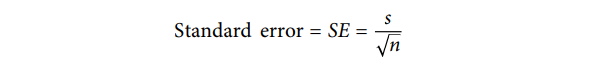

CLT와 마찬가지로 bootstrap으로 대체할 수 있어 위 계산법은 잘 사용되지 않음

### Bootstrap
sampling distribution of static을 추정하기 위한 기법으로,   
한 표본집단에서 복원 추출하여(sampling with replacement) 새로운 표본집단(bootstrap sample)을 만들고   
새로 만든 표본집단에 대한 통계량을 다시 계산하는 것

모집단 및 표본집단에 대한 가정없이, 모든 상황에서 적용할 수 있음

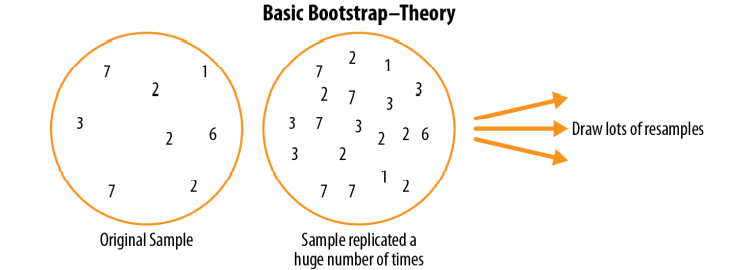

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./coffee_dataset.csv') # 모집단
print(len(df))
df.head()
# id / 21살 기준으로 적은지 많은지 / 커피를 마시는 여부 / 키(inch)

2974


,user_id,age,drinks_coffee,height
0,4509,<21,False,64.538179
1,1864,>=21,True,65.824249
2,2060,<21,False,71.319854
3,7875,>=21,True,68.569404
4,6254,<21,True,64.020226


In [3]:
df_sample = df.sample(200, replace=False) # 모집단으로부터 크기 n이 200 표본집단 추출

In [6]:
# sample에서 복원 추출해서 새로운 크기를 가진 집단을 하나 생성 (bootstrap sample)
# m번 진행 -> m개의 bootstrap sample 생성
# m개의 bootstrap sample에서 x-bar 표본량(statistic) 계산
# m개의 x-bar를 이용하여 sampling distribution of statistic

iterations = 100
heights = []
for _ in range(iterations):
    bootSample = df_sample.sample(100, replace=True)
    height = bootSample['height'].mean()
    heights.append(height)

In [8]:
print(np.array(heights).mean()) # 표본평균들의 평균 mean/x-bar
print(np.array(heights).std()) # 표본평균들의 standard error

67.18536476175383
0.3274754935885781


In [9]:
df['height'].mean() # 모평균(𝜇)

67.59748697307934

이를 기존의 standard error 계산 방식에 적용한다면,   
2,974명의 모집단으로부터 100명의 표본집단을 100회 수행하여 표본평균을 구해 모평균을 추론하는 것과 같음

bootstrap 기법을 사용함으로써 기존 만큼의 자원을 소모하지 않고도 유사한 결과를 얻을 수 있음

### 신뢰구간(Confidence Interval)
신뢰구간을 구하는 전통적인 방법은 CLT와 s.e.을 기반으로 함   
동일한 모집단으로부터 여러개의 표본집단을 추출했을 때, 표본집단마다 다른 신뢰구간을 가짐
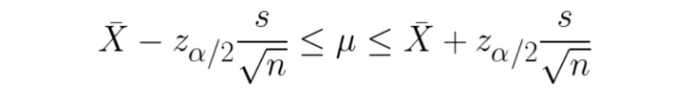
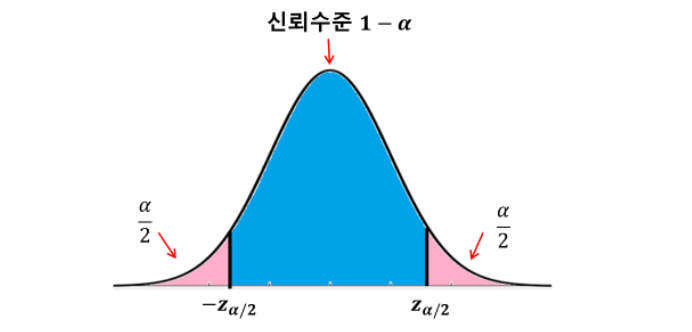
* 99% 신뢰구간 // 신뢰수준 0.99 // α = 0.01 // z(0.005) // 2.58
* 95% 신뢰구간 // 신뢰수준 0.95 // α = 0.05 // z(0.025) // 1.96
* 90% 신뢰구간 // 신뢰수준 0.90 // α = 0.10 // z(0.05) // 1.65
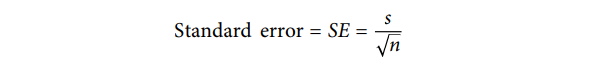
90% 신뢰구간은 동일한 모집단에서 100번 표본집단을 추출하여 신뢰구간을 계산했을 때,   
100 중 90번은 신뢰구간이 모평균을 포함할 것임을 의미함

In [10]:
# 전통적인 방법으로 c.i. 구하기
x_bar = df_sample['height'].mean()
se = df_sample['height'].std() / 200**(1/2)

print(x_bar - 1.65 * se, x_bar + 1.65 * se) # 90%
print(x_bar - 1.95 * se, x_bar + 1.96 * se) # 95%
print(x_bar - 2.58 * se, x_bar + 2.58 * se) # 99%
# 67.59748697307934

66.7918531922139 67.54765015899456
66.72314437705204 67.61864926799515
66.57885586521209 67.76064748599637


In [11]:
# bootstrap confidence interval
print(np.percentile(heights, 5), np.percentile(heights, 95)) # 90%
print(np.percentile(heights, 2.5), np.percentile(heights, 97.5)) # 95%
print(np.percentile(heights, 0.5), np.percentile(heights, 99.5)) # 99%

66.55897053167199 67.68484582121638
66.48550742883596 67.71308533999495
66.3212971063672 67.86088005465781


## 정규 분포(Normal Distribution)
* CLM 등 표본 통계량(X-bar 등)의 분포가 정규 분포를 따르는 경향이 있다는 점에서   
표본 통계량의 분포(sampling distribution of statics)를 추정/근사하기 위해 많이 사용됨
* 평균 𝜇, 표준편차 σ를 이용하여 표현함 ~ N(𝜇, σ**2)
* 평균 0, 표준편차 1인 경우 표준 정규 분포라고 부름
* 정규화 방법 중 z-score의 기본이 됨

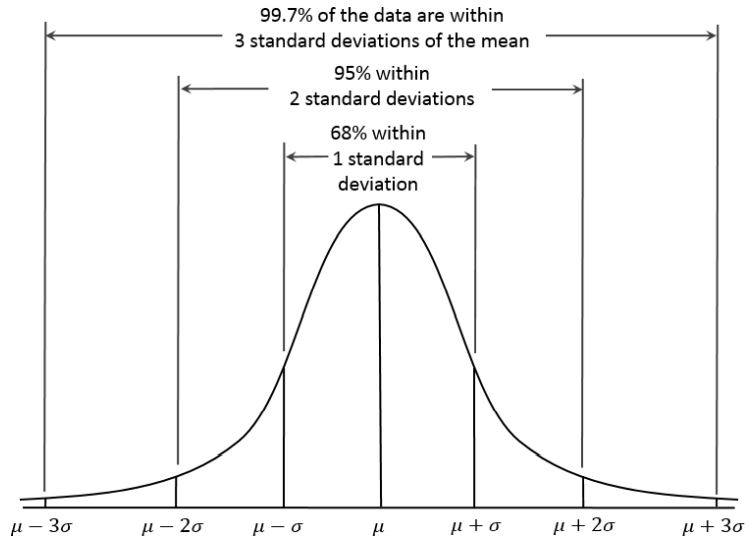

## Long-Tailed Distribution
* 표본 통계량이 아닌 실제 raw data 들 대부분은 정규 분포를 따르지 않으며,
* 어떤 variable의 분포가 정규 분포를 따를 거라는 가정은, 경험적으로 확인된 분포가 없거나 bootstrap 분포를 적용할 수 없을 때 최후의 수단으로 사용함

* 대부분의 실제 데이터는 long tail*을 가지고 있어,   
섣부른 정규 분포 가정 시 위험 예측을 부진하게 할 수 있음
* 주어진 상황이 어떤 분포를 가지는지 모델링하기 위해 해당 분야의 도메인 및 통계적 지식이 필요함


* tail: 빈도수 분포에서 길고 가는 부분(long narrow portion)   
적은 빈도수를 가진 extreme value에 의해 나타남

## Student's t-Distribution
* 정규분포와 유사한 모양이나, tail 부분이 더 길고 두꺼움
* 표본 통계량(sample statistics)의 분포를 묘사하는데 주로 사용됨
* 표본 평균의 분포는 일반적으로 t-분포의 형태를 가지며, 표본의 크기가 클수록 정규 분포와 가까워짐
* 즉 t-분포는 보통 표본의 크기가 작을 때 주로 사용됨

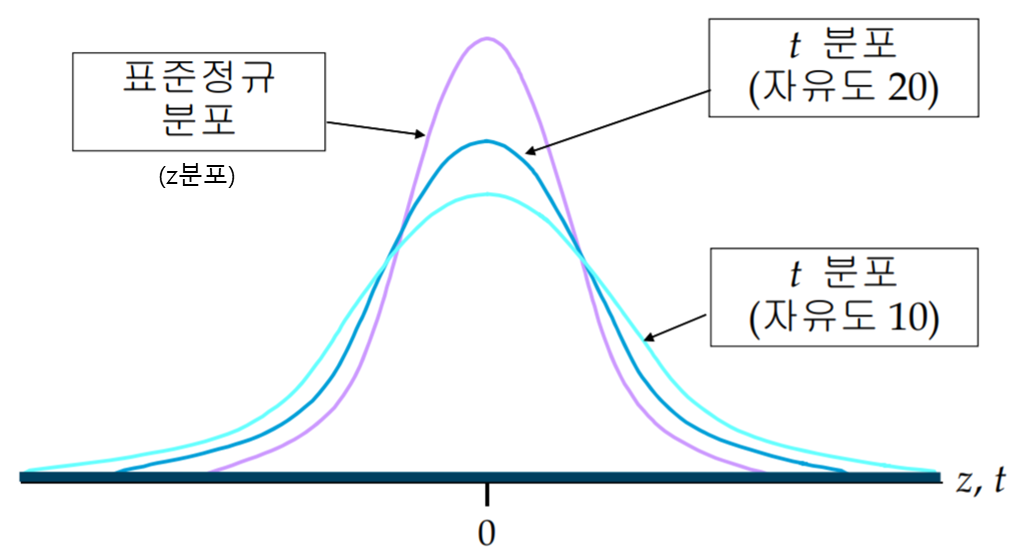

* student's t-분포를 사용한 모평균 신뢰구간   
n: 표본의 크기, x̅: 표본 평균, s: 표본 표준편차의 90% confidence interval   
t(n-1)(.05): 자유도가 n-1인 t-statistic의 값
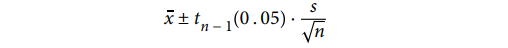
* 표본 평균의 분포, 두 그룹 간의 표본 분포 비교(가설 검정 등), 회귀 모수 추정 등에서 사용됨

## 이항 분포(Binomial Distribution)
* 시행(trial): 구체적인 결과가 나오는 사건(주사위 굴리기 등)
* Binomial trial: 결과(outcome)가 두가지인 시행(Bernoulli trial)
* Binomial distribution: x번 시행 중에 성공*한 횟수(빈도)의 분포
* success*: 시행 중 관심 대상이 되는 결과   
예시) 어떤 길을 지날 때(trial) 넘어짐, 복권 구매 시(trial) 당첨


* 이항 분포는 trial 수(n), success 확률(p), success 횟수(x)로 나타냄 ~ B(n,p)
* 이항 분포의 기대값: np, 분산: np(1-p)
* 이항 분포의 pmf(probability mass function)

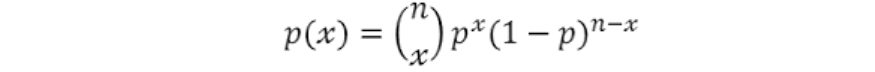

* n이 충분히 크고 p가 0.50에 가까울수록 정규 분포 형태와 가까워짐

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# np.random.binomial(n, p, 검사 횟수)
np.random.binomial(10, 0.5, 10)

array([5, 4, 5, 7, 4, 5, 6, 5, 5, 6])

In [21]:
outcomes = np.random.binomial(10, 0.2, 2000)
df = pd.Series(outcomes)
df

0       1
1       1
2       2
3       2
4       5
       ..
1995    3
1996    1
1997    4
1998    1
1999    3
Length: 2000, dtype: int32

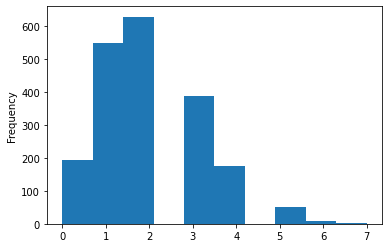

In [22]:
df.plot.hist()
plt.show()

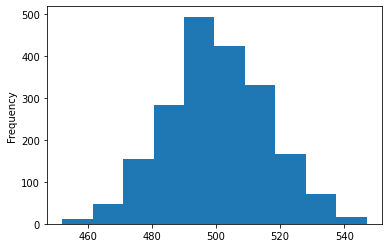

In [23]:
outcomes = np.random.binomial(1000, 0.5, 2000)
df = pd.Series(outcomes)
df.plot.hist()
plt.show()

## Chi-Square Distribution

* 얼마나 특별한 사건이 일어나는지(departure from expectation)
* expectation: 흔히 일어날 것으로 기대되는/당연한 일. null hypothesis, null model
* chi-square statistic: 어떠한 일의 결과가 null expectation에서 얼마나 벗어날 지 측정하는 통계량
* 실제로 관찰된 값과 예측값의 차의 제곱을 통해 계산
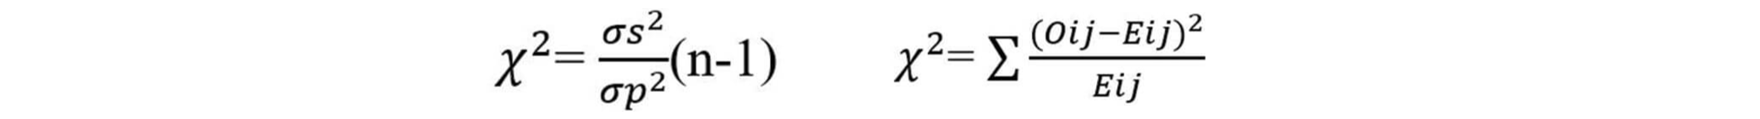


* 적합도 검정("goodness-of-fit" test): 표본 분포가 모분포를 잘 반영하는지 test
* A/B/C... test: 여러개 표본 간 비교 test
* 독립성 검정 등

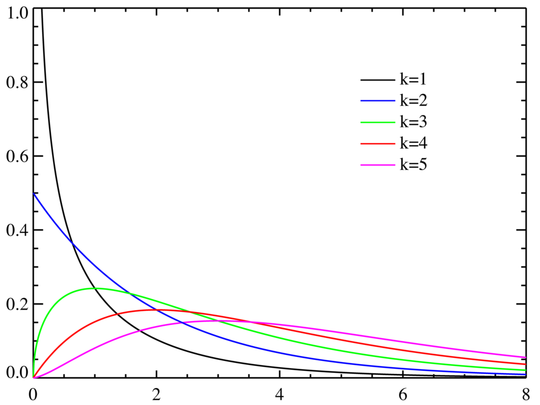

## F-Distribution
* f-statistic: 어떤 여러 집단에 대해서 실험할 때, 각 집단의 평균이 의미있게 차이나는지 측정
* 각 집단의 variability의 비율을 통해 계산
* 선형 회귀 분석에서, 회귀 분석 모델이 전체 데이터 변동을 어느 정도 설명할 수 있는지 비교하기 위해서도 사용됨


* F test
* 분산분석(ANOVA, analysis of variance)
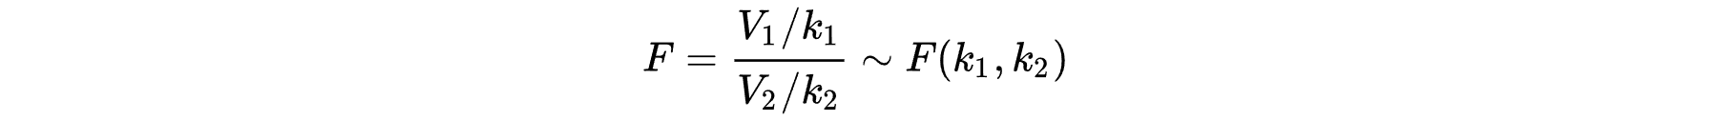

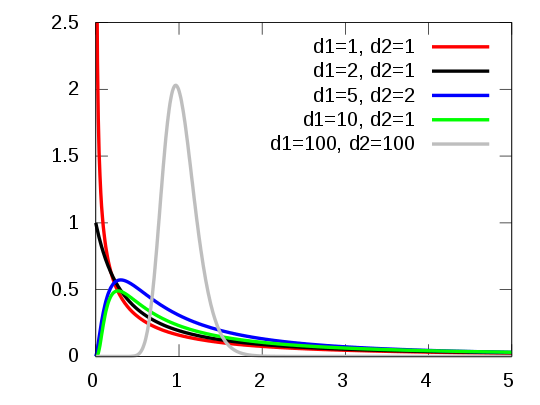

## Poisson Distribution
* 일정 시간/공간 단위 당 사건(event)의 발생 횟수를 추정/예측할 때 이용   
예시) 10초 동안 예상되는 트래픽(event) 예측 -> 예상에 대해 서버 용량 구축 등을 진행하여 대비할 수 있음
* λ: 일정 시간/공간 동안 일어나는 평균 사건 수 ~ Pois(λ), Poisson(λ)
* λ 값은 경험적으로 설정함
* poisson 분포에서는 평균과 분산이 모두 λ임

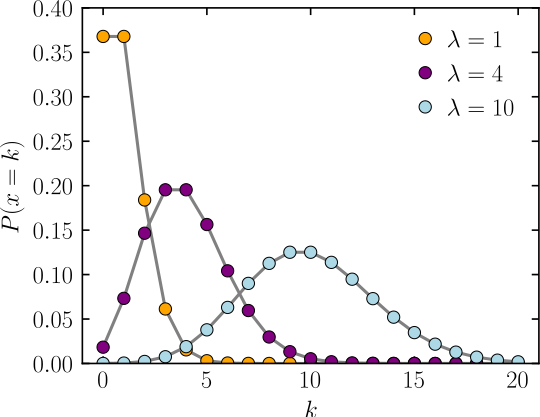

In [25]:
from scipy.stats import poisson

4

In [38]:
arr = poisson.rvs(2, size=5000)
print(arr.mean())
print(arr.var())

1.9692
2.01105136


<AxesSubplot:ylabel='Frequency'>

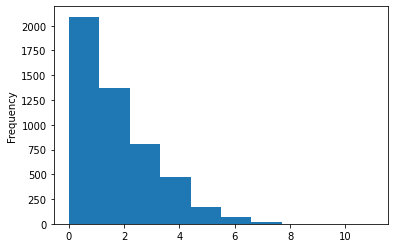

In [39]:
arr = pd.Series(arr)
arr.plot.hist()

## Exponential Distribution
* 사건(event) 간 시간/공간의 분포를 모델링할 때 사용   
예시) 웹사이트 방문(event) 후 다음 방문까지 시간(interval)
* λ: 일정 시간/공간 동안 일어나는 평균 사건 수 ~ Exp(1/λ), Exponential(1/λ)
* 평균: 1/λ, 분산 1/λ^2

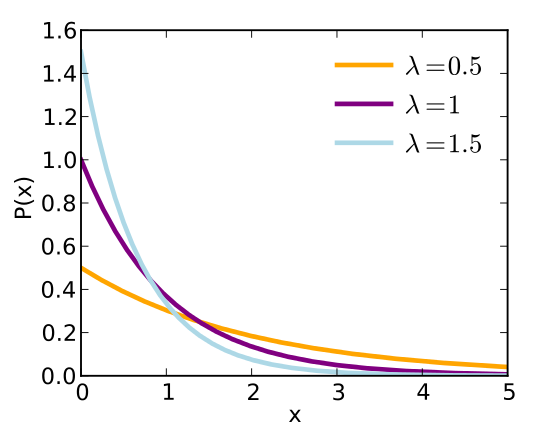

In [46]:
arr = np.random.exponential(0.5, 5000) # λ: 2
print(arr.mean())
print(arr.std())

0.5038973785895415
0.5026580597166593


<AxesSubplot:ylabel='Frequency'>

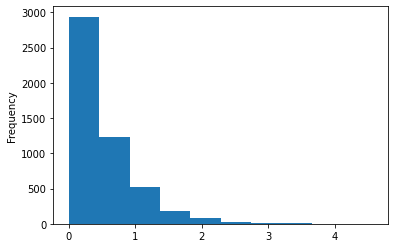

In [47]:
arr = pd.Series(arr)
arr.plot.hist()

* poisson / exponential 분포 사용 시, λ값이 유지되는 단위 시간/공간을 설정해야 함

### Estimating the Failure Rate
* 드문 사건인 경우, 시간/공간 당 사건 발생 정도(λ)를 추정할 만한 데이터가 매우 적을 수 있음(테러, 질병 등)   
1) 시뮬레이션이나 확률 계산을 통해 λ 추정   
2) goodness-of-fit test(chi-square test)를 사용하여, 보유한/관측된 데이터를 설명하는 비율 λ 추정

## Weibull Distribution
* event rate가 유지되는 시간이 일반적인 이벤트 발생 간격보다 긴 경우, 비율이 유지되는 시간 단위로 나눠서 분석   
* event rate가 interval 마다 점점 변화하는 경우, poisson/exponential 분포의 유용성이 떨어짐   
예시) 기기 고장 발생 주기 등
* Weibull 분포: exponential 분포의 확장형으로 shape parameter β를 이용하여 event rate가 바뀌는 것을 조종할 수 있음   
β > 1, the probability of an event increases over time   
β < 1, the probability decreases over time   

* Weibull 분포는 time-to-failure(수명 예측) 분석을 위해 많이 사용됨
* λ, η: scale parameter / characteristic life. 일반적으로 고장나기까지 걸리는 시간(MTTF)   
Mean Time To Failures: 수리하지 않는 부품이 사용 시작부터 고장나기까지 걸리는 시간
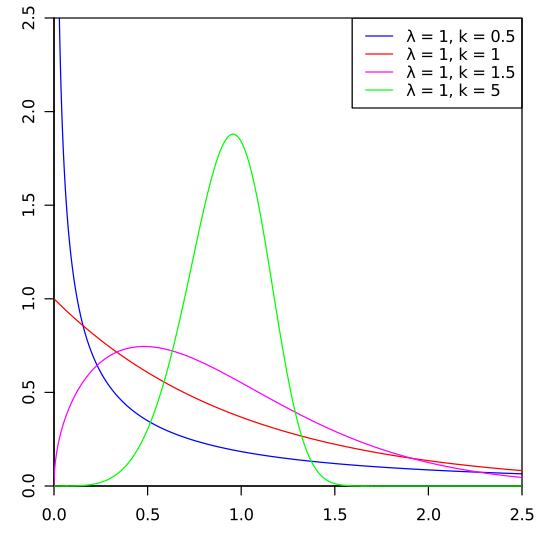